In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [7]:
X_np, Y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_np.astype(np.float32))
Y = torch.from_numpy(Y_np.astype(np.float32))
Y = Y.view(-1,1)
print(X.shape)
print(Y.shape)
n_samples, n_features = X.shape
n_samples, n_features

torch.Size([100, 1])
torch.Size([100, 1])


(100, 1)

In [8]:
model = nn.Linear(n_features, n_features)
criterion = nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
for epoch in range(num_epochs):
    y_hat = model(X)
    loss = criterion(y_hat, Y)
    loss.backward() # compute the gradient of this tensor wrt graph leaves

    optim.step() # update the weights
    optim.zero_grad() # reset the gradient accumulation

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch + 1} loss: {loss}')

epoch: 10 loss: 4377.791015625
epoch: 20 loss: 3265.44384765625
epoch: 30 loss: 2460.91552734375
epoch: 40 loss: 1878.3863525390625
epoch: 50 loss: 1456.1702880859375
epoch: 60 loss: 1149.861083984375
epoch: 70 loss: 927.447509765625
epoch: 80 loss: 765.82177734375
epoch: 90 loss: 648.28369140625
epoch: 100 loss: 562.7490844726562


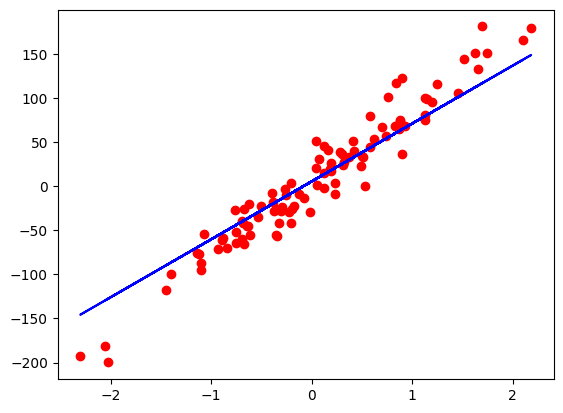

In [9]:
predicted = model(X).detach().cpu()
plt.plot(X_np, Y_np, 'ro')
plt.plot(X_np, predicted, 'b')
plt.show()
